In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


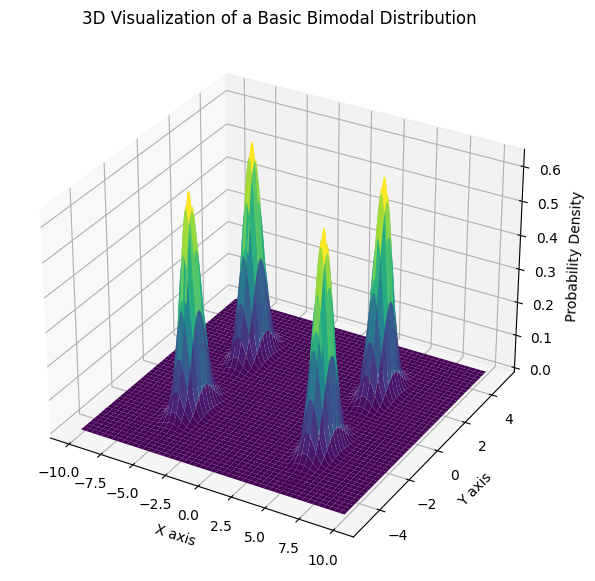

In [2]:
# Re-importing necessary libraries and redefining parameters due to code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

# Re-defining the parameters for the bimodal distribution
mean_x1, std_dev_x1 = -5, 0.5
mean_x2, std_dev_x2 = 5, 0.5
mean_y1, std_dev_y1 = -2, 0.5
mean_y2, std_dev_y2 = 2, 0.5

# Generating points for the distributions along x and y axes
x = np.linspace(-10, 10, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# Generating the bimodal distributions along x and y axes
Z_basic = (norm.pdf(X, mean_x1, std_dev_x1) + norm.pdf(X, mean_x2, std_dev_x2)) * \
          (norm.pdf(Y, mean_y1, std_dev_y1) + norm.pdf(Y, mean_y2, std_dev_y2))

# Plotting the basic bimodal distribution
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_basic, cmap='viridis', edgecolor='none')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
ax.set_title('3D Visualization of a Basic Bimodal Distribution')
plt.show()


In [3]:
import random

def metropolis_hastings_tempered(target_density, steps=1000, start=(0, 0), initial_scale=0.1, final_scale=5.0):
    """
    Metropolis-Hastings algorithm for MCMC sampling with tempering.
    :param target_density: The target density function for sampling.
    :param steps: Number of steps in the MCMC simulation.
    :param start: Starting point of the simulation.
    :param initial_scale: Initial scale of the proposal distribution.
    :param final_scale: Final scale of the proposal distribution.
    :return: A list of points representing the MCMC path.
    """
    x, y = start
    path = []
    scale = initial_scale
    scale_increment = (final_scale - initial_scale) / steps

    for step in range(steps):
        # Gradually increase the scale (tempering)
        scale += scale_increment

        # Propose a new point
        x_new, y_new = np.array([x, y]) + np.random.normal(0, scale, 2)
        
        # Calculate acceptance ratio
        accept_ratio = target_density(x_new, y_new) / target_density(x, y)
        
        # Accept or reject the new point
        if random.random() < accept_ratio:
            x, y = x_new, y_new
        
        path.append((x, y))
    
    return path



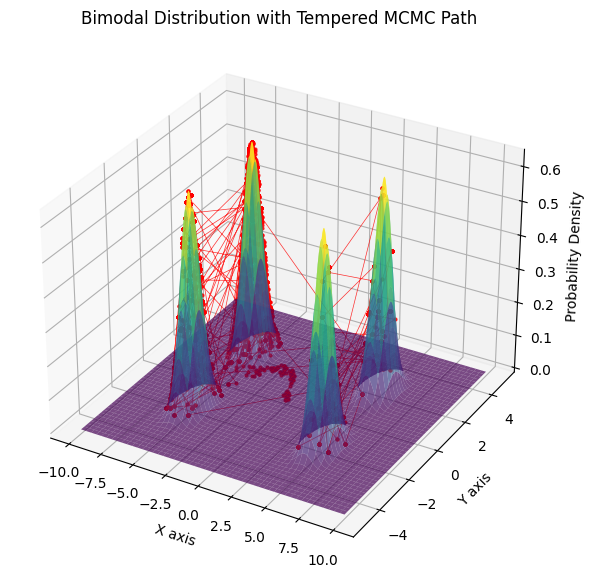

In [4]:
# Redefining the bimodal density function due to code execution state reset
def bimodal_density(x, y):
    return (norm.pdf(x, mean_x1, std_dev_x1) + norm.pdf(x, mean_x2, std_dev_x2)) * \
           (norm.pdf(y, mean_y1, std_dev_y1) + norm.pdf(y, mean_y2, std_dev_y2))

# Running the tempered Metropolis-Hastings algorithm again
tempered_mcmc_path = metropolis_hastings_tempered(bimodal_density, steps=5000)

# Separating the x and y coordinates of the path
path_x_tempered, path_y_tempered = zip(*tempered_mcmc_path)
path_z_tempered = [bimodal_density(x, y) for x, y in tempered_mcmc_path]

# Plotting the updated 3D plot with the tempered MCMC path
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Creating the surface plot for the bimodal distribution
ax.plot_surface(X, Y, Z_basic, cmap='viridis', alpha=0.7, edgecolor='none')

# Plotting the tempered MCMC path
ax.plot(path_x_tempered, path_y_tempered, path_z_tempered, color='r', marker='o', markersize=2, linestyle='-', linewidth=0.5, alpha=0.8)

# Adding labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
ax.set_title('Bimodal Distribution with Tempered MCMC Path')

# Display the plot
plt.show()


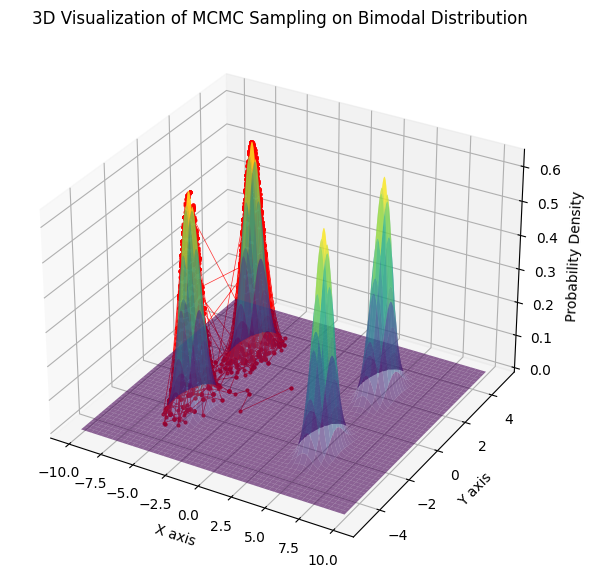

In [5]:
import random

def metropolis_hastings(target_density, steps=1000, start=(0, 0)):
    """
    Metropolis-Hastings algorithm for MCMC sampling.
    :param target_density: The target density function for sampling.
    :param steps: Number of steps in the MCMC simulation.
    :param start: Starting point of the simulation.
    :return: A list of points representing the MCMC path.
    """
    x, y = start
    path = []
    for _ in range(steps):
        # Propose a new point
        x_new, y_new = np.array([x, y]) + np.random.normal(0, 1, 2)
        
        # Calculate acceptance ratio
        accept_ratio = target_density(x_new, y_new) / target_density(x, y)
        
        # Accept or reject the new point
        if random.random() < accept_ratio:
            x, y = x_new, y_new
        
        path.append((x, y))
    
    return path

# Target density function (bimodal distribution)
def bimodal_density(x, y):
    return (norm.pdf(x, mean_x1, std_dev_x1) + norm.pdf(x, mean_x2, std_dev_x2)) * \
           (norm.pdf(y, mean_y1, std_dev_y1) + norm.pdf(y, mean_y2, std_dev_y2))

# Running the Metropolis-Hastings algorithm
mcmc_path = metropolis_hastings(bimodal_density, steps=5000)

# Separating the x and y coordinates of the path
path_x, path_y = zip(*mcmc_path)
path_z = [bimodal_density(x, y) for x, y in mcmc_path]

# Plotting the updated 3D plot with the MCMC path
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Creating the surface plot
ax.plot_surface(X, Y, Z_basic, cmap='viridis', alpha=0.6, edgecolor='none')

# Plotting the MCMC path
ax.plot(path_x, path_y, path_z, color='r', marker='o', markersize=2, linestyle='-', linewidth=0.5, alpha=0.8)

# Adding labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
ax.set_title('3D Visualization of MCMC Sampling on Bimodal Distribution')

# Display the plot
plt.show()


In [6]:
# Identifying the maximum height of the bimodal distribution
peak_height = np.max(Z_basic)

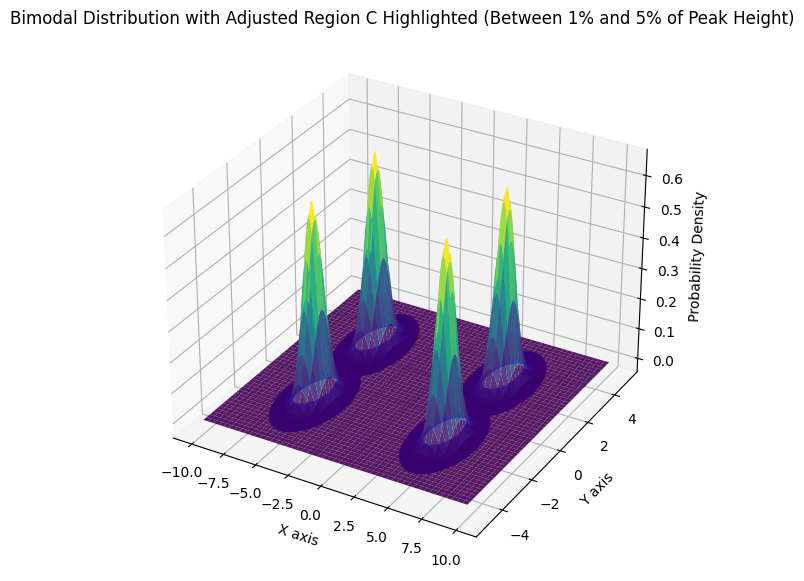

In [7]:
upper_threshold_adjusted = 0.05 * peak_height
lower_threshold_adjusted = 0.0001 * peak_height

# Generating a mask for the adjusted region C
mask_C_adjusted = (Z_basic >= lower_threshold_adjusted) & (Z_basic <= upper_threshold_adjusted)

# Plotting the bimodal distribution with the adjusted region C highlighted
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Creating the surface plot for the bimodal distribution
ax.plot_surface(X, Y, Z_basic, cmap='viridis',alpha=0.9, edgecolor='none')

# Scatter plot for the adjusted region C
X_C_adjusted, Y_C_adjusted, Z_C_adjusted = X[mask_C_adjusted], Y[mask_C_adjusted], Z_basic[mask_C_adjusted] 
ax.scatter(X_C_adjusted, Y_C_adjusted, Z_C_adjusted, color='b', s=10)  # Small red dots to represent region C

# Adding labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
ax.set_title('Bimodal Distribution with Adjusted Region C Highlighted (Between 1% and 5% of Peak Height)')

# Display the plot
plt.show()